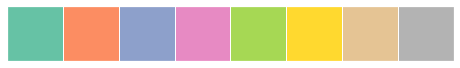

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats
from scipy.fftpack import fft,fftfreq,ifft
import scipy.integrate as it
import seaborn as sns
sns.set()
sns.palplot(sns.color_palette("Set2"))

In [2]:
data = pd.read_csv('../Raw_data/15min_sam.csv')
k_data = pd.read_csv('../Raw_data/walk_kevin.csv')
v_data = pd.read_csv('../Raw_data/walk_vera.csv')

In [3]:
kfs = 100
kT = 1/kfs
kL = int(k_data.shape[0])

vfs = 100
vT = 1/vfs
vL = int(v_data.shape[0])

sfs = 400
sT = 1/sfs
sL = int(data.shape[0])

In [4]:
# k-data filt
b, a = signal.butter(4, 0.1, btype='lowpass', analog=False)
xk = signal.filtfilt(b, a, k_data['gFx'])
b, a = signal.butter(4, 0.1, btype='lowpass', analog=False)
yk = signal.filtfilt(b, a, k_data['gFy'])
b, a = signal.butter(4, 0.1, btype='lowpass', analog=False)
zk= signal.filtfilt(b, a, k_data['gFz'])
timek = k_data['time']

In [5]:
# v-data filter
b, a = signal.butter(4, 0.08, btype='lowpass', analog=False)
xv = signal.filtfilt(b, a, v_data['gFx'])
b, a = signal.butter(4, 0.08, btype='lowpass', analog=False)
yv = signal.filtfilt(b, a, v_data['gFy'])
b, a = signal.butter(4, 0.08, btype='lowpass', analog=False)
zv = signal.filtfilt(b, a, v_data['gFz'])
timev = v_data['time']

In [6]:
# data filter
b,a = signal.butter(4,0.02,btype = 'lowpass',analog = False)
xs = signal.filtfilt(b,a,data['gFx'])
b,a = signal.butter(4,0.02,btype = 'lowpass',analog = False)
ys = signal.filtfilt(b,a,data['gFy'])
b,a = signal.butter(4,0.02,btype = 'lowpass',analog = False)
zs = signal.filtfilt(b,a,data['gFz'])
times = data['time']

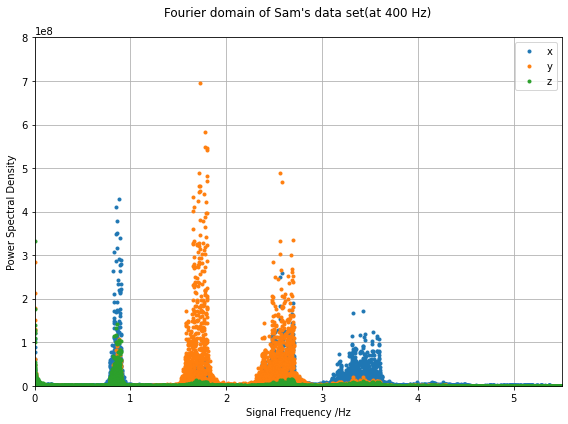

In [35]:
# # poer spectral desity
xs_PSD = np.abs(fft(xs))**2
ys_PSD = np.abs(fft(ys))**2
zs_PSD = np.abs(fft(zs))**2
freq = fftfreq(sL,d = sT)
si = freq > 0

plt.plot(freq[si], xs_PSD[si],'.')
plt.plot(freq[si], ys_PSD[si],'.')
plt.plot(freq[si], zs_PSD[si],'.')
plt.xlim(0,5.5)
plt.ylim(0,0.8e9)

plt.legend(["x","y","z"])
plt.title("Fourier domain of Sam's data set(at 400 Hz)\n")
plt.ylabel("Power Spectral Density")
plt.xlabel("Signal Frequency /Hz")
plt.grid()
# plt.savefig("SamFourier.png")
figure = plt.gcf()
figure.set_size_inches(8, 6)
figure.tight_layout()
figure.savefig('SamFourier.png',dpi=100)
plt.show()



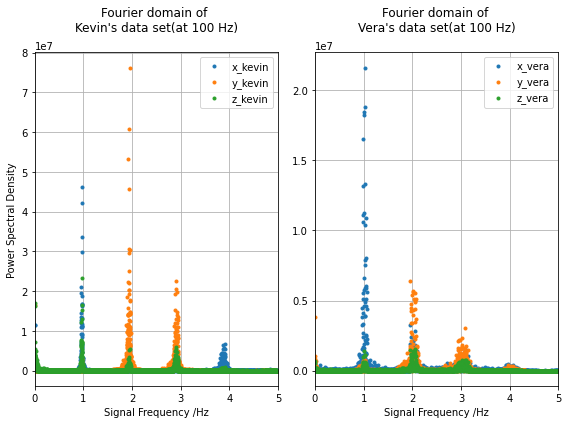

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2)
xk_PSD = np.abs(fft(xk))**2
yk_PSD = np.abs(fft(yk))**2
zk_PSD = np.abs(fft(zk))**2
kfreq = fftfreq(kL,d = kT)
ki = kfreq > 0

ax1.plot(kfreq[ki], xk_PSD[ki],'.')
ax1.plot(kfreq[ki], yk_PSD[ki],'.')
ax1.plot(kfreq[ki], zk_PSD[ki],'.')
ax1.set_xlim(0,5)
ax1.grid()
ax1.set_title("Fourier domain of \nKevin's data set(at 100 Hz)\n")
ax1.set_ylabel("Power Spectral Density")
ax1.set_xlabel("Signal Frequency /Hz")

ax1.legend(["x_kevin","y_kevin","z_kevin"])

# vera's data

xv_PSD = np.abs(fft(xv))**2
yv_PSD = np.abs(fft(yv))**2
zv_PSD = np.abs(fft(zv))**2
vfreq = fftfreq(vL,d = vT)
vi = vfreq > 0

ax2.plot(vfreq[vi], xv_PSD[vi],'.')
ax2.plot(vfreq[vi], yv_PSD[vi],'.')
ax2.plot(vfreq[vi], zv_PSD[vi],'.')
ax2.set_title("Fourier domain of \nVera's data set(at 100 Hz)\n")
ax2.set_xlabel("Signal Frequency /Hz")
# plt.plot(freq[i], xv_PSD[i])
# plt.plot(freq[i], yv_PSD[i])
# plt.plot(freq[i], zv_PSD[i])
plt.xlim(0,5)
ax2.grid()

ax2.legend(["x_vera","y_vera","z_vera"])

figure = plt.gcf()
figure.set_size_inches(8, 6)
figure.tight_layout()
figure.savefig('VeraVersKevin.png',dpi=100)
plt.show()

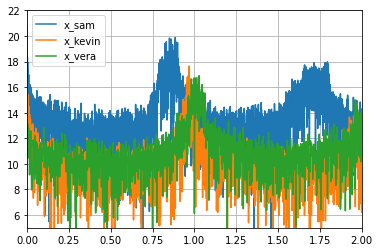

In [70]:
# plt.plot(freq[si], np.log(xs_PSD[si]),'.')
# plt.plot(kfreq[ki],np.log(xk_PSD[ki]) ,'.')
# plt.plot(vfreq[vi], np.log(xv_PSD[vi]),'.')
plt.plot(freq[si], np.log(xs_PSD[si]))
plt.plot(kfreq[ki],np.log(xk_PSD[ki]))
plt.plot(vfreq[vi], np.log(xv_PSD[vi]))
# plt.xlim(0.5,5)
plt.xlim(0,2)
plt.legend(["x_sam","x_kevin","x_vera"])
plt.ylim(5,22)
plt.grid()

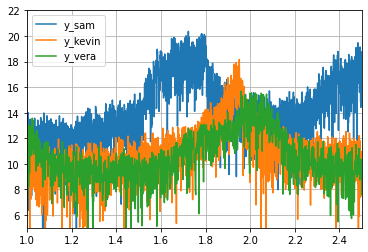

In [63]:
plt.plot(freq[si], np.log(ys_PSD[si]))
plt.plot(kfreq[ki],np.log(yk_PSD[ki]))
plt.plot(vfreq[vi], np.log(yv_PSD[vi]))
plt.xlim(1,2.5)
# plt.xlim(0,2)
plt.legend(["y_sam","y_kevin","y_vera"])
plt.ylim(5,22)
plt.grid()

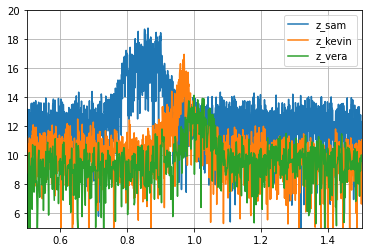

In [71]:
plt.plot(freq[si], np.log(zs_PSD[si]))
plt.plot(kfreq[ki],np.log(zk_PSD[ki]))
plt.plot(vfreq[vi], np.log(zv_PSD[vi]))
# plt.xlim(1,2.5)
plt.xlim(0.5,1.5)
plt.legend(["z_sam","z_kevin","z_vera"])
plt.ylim(5,20)
plt.grid()

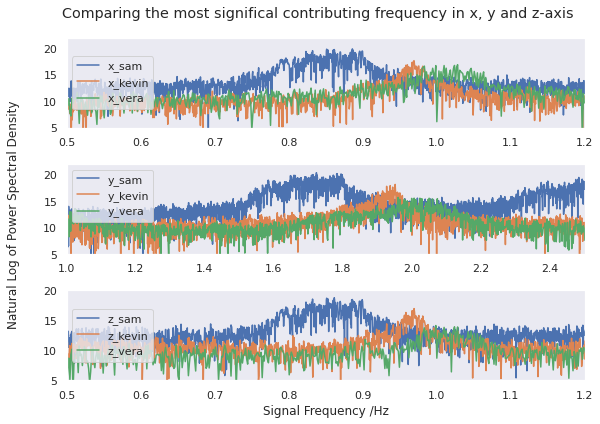

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(freq[si], np.log(xs_PSD[si]))
ax1.plot(kfreq[ki],np.log(xk_PSD[ki]))
ax1.plot(vfreq[vi], np.log(xv_PSD[vi]))
# plt.xlim(0.5,5)
ax1.set_xlim(0.5,1.2)
ax1.legend(["x_sam","x_kevin","x_vera"],loc = 'center left')
ax1.set_ylim(5,22)
ax1.grid()

# ax2
ax2.plot(freq[si], np.log(ys_PSD[si]))
ax2.plot(kfreq[ki],np.log(yk_PSD[ki]))
ax2.plot(vfreq[vi], np.log(yv_PSD[vi]))
ax2.set_xlim(1,2.5)
# plt.xlim(0,2)
ax2.legend(["y_sam","y_kevin","y_vera"])
ax2.set_ylim(5,22)
ax2.grid()

# ax3
ax3.plot(freq[si], np.log(zs_PSD[si]))
ax3.plot(kfreq[ki],np.log(zk_PSD[ki]))
ax3.plot(vfreq[vi], np.log(zv_PSD[vi]))
# plt.xlim(1,2.5)
ax3.set_xlim(0.5,1.2)
ax3.legend(["z_sam","z_kevin","z_vera"],loc = 'center left')
ax3.set_ylim(5,20)
ax3.grid()
ax3.set_xlabel("Signal Frequency /Hz")

fig.suptitle("Comparing the most significal contributing frequency in x, y and z-axis")
fig.text(-0.04, 0.5, 'Natural Log of Power Spectral Density', va='center', rotation='vertical')

figure = plt.gcf()
figure.set_size_inches(8, 6)
figure.tight_layout()
figure.savefig('Most_significant_freq.png',dpi=100)
plt.show()
